# Logistic Regression

### Introduction
Logistic Regression là một model cho output là các xác suất (probability). Logistic Regression thường được sử dụng cho bài toán phân loại (classification).  
Giả dụ, chúng ta có data về kích thước của các khối u và khối u nào là u lành tính, u ác tính. Để phân loại một khối u dựa trên kích thước của nó, ta tính xác suất khối u đó là u ác tính, sau đó so sánh xác suất đó với một ngưỡng xác định (threshold). VD: Threshold là 0.5, nếu xác suất khối u đó ác tính là 0.34 thì khối u là u lành tính.   
Tuy nhiên, làm thế nào để tính được xác suất là u lành tính/ác tính khi có dữ liệu về kích thước? Chúng ta dùng hàm *tanh* hoặc hàm *sigmoid*. Ở đây, mình chỉ trình bày về hàm *sigmoid*.

### Sigmoid Function
*sigmoid* function, hay còn gọi là logistic function, là một hàm map các giá trị dự đoán đến giá trị xác suất từ 0 đến 1.  
Công thức:
$$\sigma(z)=\frac{1}{1+e^{-z}}$$
Xét các trường hợp:   
$z \rightarrow \infty \Rightarrow \sigma(z) \rightarrow 1$   
$z \rightarrow -\infty \Rightarrow \sigma(z) \rightarrow 0$    
$z = 0 \Rightarrow \sigma(z) = 0.5$  
![graph: sigmoid function and its derivative](image.png)

### Logistic Regression Model
Output của Logistic Regression model được viết dưới dạng:  
$$\overrightarrow{y}=\sigma(\overrightarrow{w}\cdot\overrightarrow{x}+b)=\frac{1}{1+e^{-(\overrightarrow{w}\cdot\overrightarrow{x}+b)}}$$

### Decision Boundary
Decision Boundary là ranh giới phân biệt các lớp (classes) khác nhau.   
Để xác định decision boundary, chúng ta cần:
1. Đặt ra threshold cho predicted output $\hat{y}$   
VD: Trong bài toán phân loại khối u nói trên (một bài toán binary classification điển hình), ta đặt threshold: Nếu predicted output lớn hơn hoặc bằng 50% thì khối u đó ác tính, hay nếu $\hat{y}=\sigma(z) \geq 0.5$ thì $y=1$, với $z = \overrightarrow{w}\cdot\overrightarrow{x}+b$
2. Tính $\hat{x}$ (decision boundary)   
VD: $\hat{y}=\sigma(z)=\sigma(\overrightarrow{w}\cdot\overrightarrow{x}+b) \geq 0.5 \Longleftrightarrow z \geq 0$   
Sau khi tìm được $\overrightarrow{w}$ và $b$ tối ưu, giải $\overrightarrow{x}$ để $z=0$:    
$z=\overrightarrow{w}\cdot\overrightarrow{x}+b=0$  
VD: Ta có $\sigma(z)=\sigma(w_{1}x_{1}^2+w_{2}x_{2}^2+b)$ và $w_{1}=w_{2}=1, b=-1$  
$\Rightarrow$ Decision boundary: $x_{1}^2+x_{2}^2-1=0$ (Đường tròn có  tâm tại gốc tọa độ và bán kính bằng 1)


### Cost Function
Định nghĩa: $L(f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}),y^{(i)})$ là loss (sai khác) trên mỗi training example; cost trên toàn bộ dataset là tổng loss trên tất cả training examples.   
$$L(f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}),y^{(i)})=\begin{cases}
-log(f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)})) \text{ if } y^{(i)}=1\\
-log(1-f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)})) \text{ if } y^{(i)}=0\\
\end{cases}$$   
Xét $y^{(i)}=1$: 
- Nếu $f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)})=1$ thì $L=0$
- Nếu $f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)})=0$ thì $L \rightarrow \infty$ 
    
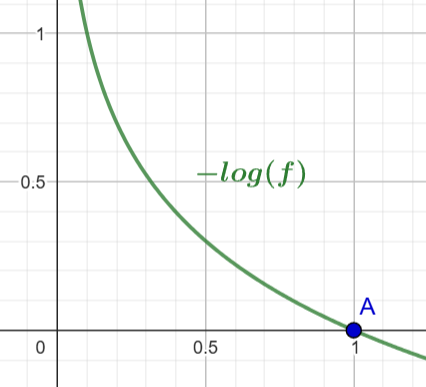      
Xét $y_{(i)}=0$:
- Nếu $f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)})=1$ thì $L \rightarrow \infty$
- Nếu $f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)})=0$ thì $L=0$    
    
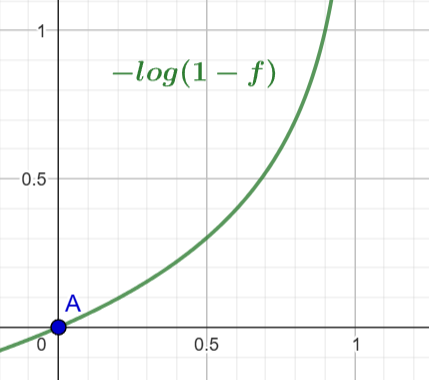    
     
**Cost function**:
$$J(\overrightarrow{w},b)=\frac{1}{m} \sum_{i=1}^{m} L(f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}))$$   
$L(f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}))$ có thể viết gọn như sau:   
     
$L(f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)})) = -y^{(i)}log(f)-(1-y^{(i)}(1-log(f)))$   
- Khi $y^{(i)}=1$: $L=-log(f)$  
- Khi $y^{(i)}=0$: $L=-(1-log(f))$
     
Thay vào $J(\overrightarrow{w},b)$:
$$J(\overrightarrow{w},b)=\frac{1}{m} \sum_{i=1}^{m} -y^{(i)}log(f)-(1-y^{(i)}(1-log(f)))$$

### Gradient Descend for Logistic Regression